In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from tensorflow.contrib.layers import fully_connected

In [2]:
data = make_blobs(n_samples=100, n_features=3, centers=2, random_state=101)

In [3]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [4]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

In [5]:
from mpl_toolkits.mplot3d import Axes3D

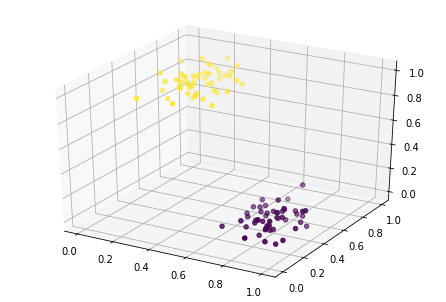

In [10]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_x, data_y, data_z,c = data[1])

In [11]:
num_input = 3
num_hidden = 2
num_output = num_input

In [12]:
learning_rate = 0.01

In [13]:
import tensorflow as tf

In [14]:
X = tf.placeholder(tf.float32,shape=[None,num_input])

In [16]:
hidden = fully_connected(X,num_hidden,activation_fn=None)
output = fully_connected(hidden,num_output,activation_fn=None)

In [17]:
loss = tf.reduce_mean(tf.square(output - X))

In [19]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [20]:
init = tf.global_variables_initializer()

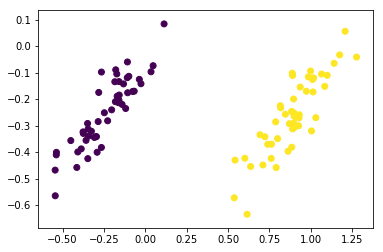

In [21]:
num_epochs = 1000
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(num_epochs):
        sess.run(train, feed_dict={X:scaled_data})
    
    output_2d = hidden.eval(feed_dict={X:scaled_data})

plt.scatter(output_2d[:,0], output_2d[:,1], c=data[1])